<a href="https://colab.research.google.com/github/dpierso1/Pierson_IT533/blob/main/Week_11_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42) 

# Read in the data as adult dataframe. 
adult = pd.read_csv("https://raw.githubusercontent.com/dpierso1/Pierson_IT533/main/airline_passenger_satisfaction.csv")

Current TensorFlow version is 2.12.0


In [2]:
adult.head()

,ID,Gender,Age,CustomerType,TypeOfTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,EaseOfOnlineBooking,...,On-boardService,SeatComfort,LegRoom,Cleanliness,FoodAndDrink,In-flightWifi,In-flightEntertainment,BaggageHandling,PriceUSD,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,3,5,5,1053.59,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,2,5,5,1051.94,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,4,3,3,1627.35,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,2,5,5,2520.45,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,6048.50,Satisfied


In [4]:
adult_dl = pd.DataFrame(adult, columns = ['Age', 'FlightDistance', 'Cleanliness','On-boardService','PriceUSD'])
adult_dl.head()

,Age,FlightDistance,Cleanliness,On-boardService,PriceUSD
0,48,821,5,3,1053.59
1,35,821,5,5,1051.94
2,41,853,5,3,1627.35
3,50,1905,4,5,2520.45
4,49,3470,5,3,6048.50


In [5]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('PriceUSD')
test_labels = test_features.pop('PriceUSD')

In [7]:
normalizer = preprocessing.Normalization(axis=-1)

In [8]:
normalizer.adapt(np.array(train_features))

In [9]:
print(normalizer.mean.numpy())

[[  39.405933  1182.3593       3.284125     3.3817616]]


In [10]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first)
  print()
  print('Normalized data:', normalizer(first).numpy())

Original data: [[ 71 223   4   3]]

Normalized data: [[ 2.09 -0.96  0.55 -0.3 ]]


In [11]:
# First, we build the normalization layer:
Age_new = np.array(train_features['Age'])

Age_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
Age_normalizer.adapt(Age_new)

In [12]:
# Now we build the framework that holds all the models:
Age_model = tf.keras.Sequential([
    Age_normalizer,
    layers.Dense(units=1)
])



In [13]:
Age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [14]:
%%time
history = Age_model.fit(
    train_features['Age'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2)

KeyboardInterrupt: ignored

In [15]:
train_features['Age']

102389    71
108473    25
87998     44
58362     66
42254     38
          ..
24536     27
117333    54
44119     37
105539    39
75167     16
Name: Age, Length: 100901, dtype: int64

In [16]:
x = tf.linspace(0.0, 250, 251)
y = Age_model.predict(x)

8/8 [==============================] - 0s 2ms/step


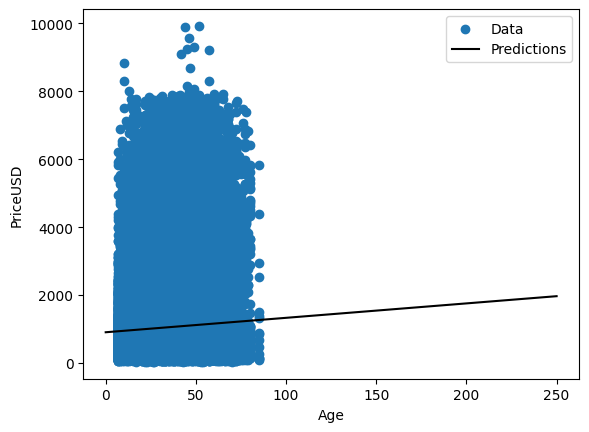

In [17]:
def plot_age(x, y):
  plt.scatter(train_features['Age'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Age')
  plt.ylabel('PriceUSD')
  plt.legend()
plot_age(x,y) 

In [18]:
test_results = {}

test_results['Age_model'] = Age_model.evaluate(
    test_features['Age'],
    test_labels, verbose=0)

In [19]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [20]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 0.90453315],
       [-0.11817884],
       [ 0.5395309 ],
       [-0.2774979 ]], dtype=float32)>

In [21]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [22]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=32,
    # 10 epochs, so we turn on logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/32
2523/2523 [==============================] - 7s 3ms/step - loss: 1555.6476 - val_loss: 1418.9253
Epoch 2/32
2523/2523 [==============================] - 5s 2ms/step - loss: 1319.7367 - val_loss: 1188.8247
Epoch 3/32
2523/2523 [==============================] - 6s 2ms/step - loss: 1086.3130 - val_loss: 958.2673
Epoch 4/32
2523/2523 [==============================] - 5s 2ms/step - loss: 854.0023 - val_loss: 733.7217
Epoch 5/32
2523/2523 [==============================] - 5s 2ms/step - loss: 636.7191 - val_loss: 534.4290
Epoch 6/32
2523/2523 [==============================] - 6s 2ms/step - loss: 456.6473 - val_loss: 392.5434
Epoch 7/32
2523/2523 [==============================] - 6s 2ms/step - loss: 355.3111 - val_loss: 330.8299
Epoch 8/32
2523/2523 [==============================] - 6s 2ms/step - loss: 317.6133 - val_loss: 312.8065
Epoch 9/32
2523/2523 [==============================] - 5s 2ms/step - loss: 309.5049 - val_loss: 309.6366
Epoch 10/32
2523/2523 [==================

In [23]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [24]:
def build_and_compile_model(norm):
  model = keras.Sequential([                 # Here you are setting up the keras.Sequential architecture
      norm,                                  # This is the normalizer function we built before
      layers.Dense(64, activation='relu'),   # Here is the first hidden layer--64 nodes, built with the relu function
      layers.Dense(64, activation='relu'),   # Here is the second hidden layer, also built with the relu function
      layers.Dense(1)                        # Here is the Dense layer for a single output because we are working on a REGRESSION
  ])                                         # AND WE'RE DONE WITH BUILDING THE MODEL!

  model.compile(loss='mean_absolute_error',   # Now we configure the runtime for our model; the loss function is mean absolute error--makes sense for a regression!
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [25]:
dnn_Age_model = build_and_compile_model(Age_normalizer)

In [26]:
dnn_Age_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [27]:
%%time
history = dnn_Age_model.fit(
    train_features['Age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
2523/2523 [==============================] - 7s 2ms/step - loss: 1194.5175 - val_loss: 1116.3873
Epoch 2/10
2523/2523 [==============================] - 9s 3ms/step - loss: 1129.0410 - val_loss: 1115.9647
Epoch 3/10
2523/2523 [==============================] - 12s 5ms/step - loss: 1128.9578 - val_loss: 1116.2633
Epoch 4/10
2523/2523 [==============================] - 7s 3ms/step - loss: 1128.9611 - val_loss: 1116.4170
Epoch 5/10
2523/2523 [==============================] - 8s 3ms/step - loss: 1128.9180 - val_loss: 1116.0336
Epoch 6/10
2523/2523 [==============================] - 12s 5ms/step - loss: 1128.9479 - val_loss: 1115.9897
Epoch 7/10
2523/2523 [==============================] - 6s 3ms/step - loss: 1128.9637 - val_loss: 1116.3879
Epoch 8/10
2523/2523 [==============================] - 8s 3ms/step - loss: 1128.9078 - val_loss: 1116.0961
Epoch 9/10
2523/2523 [==============================] - 12s 5ms/step - loss: 1128.9211 - val_loss: 1116.1158
Epoch 10/10
2523/2523 [==

In [28]:
train_labels

102389     385.35
108473    2012.45
87998      416.11
58362      504.56
42254      626.82
           ...   
24536     1381.24
117333     738.22
44119      249.63
105539     360.64
75167     1098.56
Name: PriceUSD, Length: 100901, dtype: float64

8/8 [==============================] - 0s 2ms/step


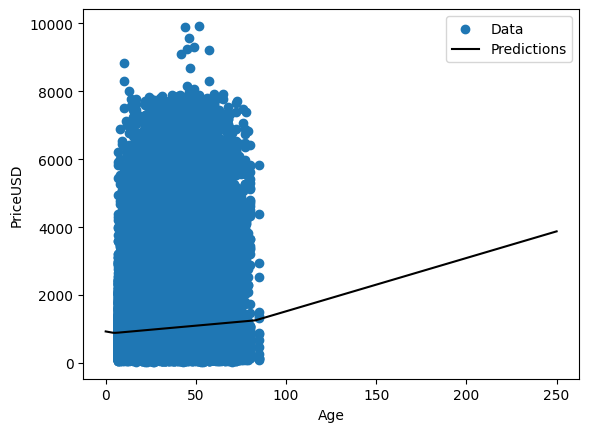

In [29]:
x = tf.linspace(0.0, 250, 251)
y = dnn_Age_model.predict(x)

plot_age(x, y)

In [30]:
test_results['dnn_Age_model'] = dnn_Age_model.evaluate(
    test_features['Age'], test_labels,
    verbose=0)

In [31]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [32]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=32)

Epoch 1/32
2523/2523 [==============================] - 8s 3ms/step - loss: 540.1204 - val_loss: 310.3044
Epoch 2/32
2523/2523 [==============================] - 7s 3ms/step - loss: 307.2419 - val_loss: 306.4394
Epoch 3/32
2523/2523 [==============================] - 9s 4ms/step - loss: 306.0053 - val_loss: 306.7449
Epoch 4/32
2523/2523 [==============================] - 6s 2ms/step - loss: 305.8461 - val_loss: 306.5855
Epoch 5/32
2523/2523 [==============================] - 7s 3ms/step - loss: 305.8026 - val_loss: 306.6138
Epoch 6/32
2523/2523 [==============================] - 6s 2ms/step - loss: 305.7204 - val_loss: 306.2265
Epoch 7/32
2523/2523 [==============================] - 8s 3ms/step - loss: 305.4932 - val_loss: 305.9852
Epoch 8/32
2523/2523 [==============================] - 7s 3ms/step - loss: 305.5469 - val_loss: 306.4074
Epoch 9/32
2523/2523 [==============================] - 7s 3ms/step - loss: 305.4271 - val_loss: 305.8597
Epoch 10/32
2523/2523 [=======================

In [33]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=0)

CPU times: user 87.3 ms, sys: 7.03 ms, total: 94.3 ms
Wall time: 96.2 ms


789/789 [==============================] - 5s 6ms/step


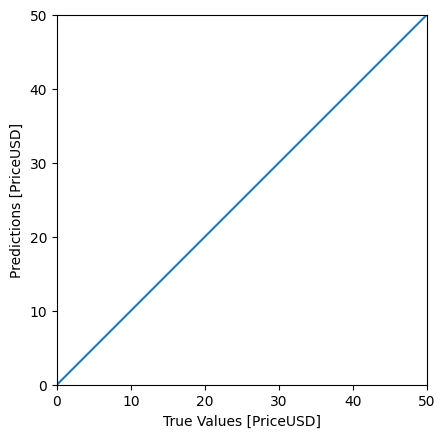

In [35]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PriceUSD]')
plt.ylabel('Predictions [PriceUSD]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [36]:
test_predictions = dnn_model.predict(test_features).flatten()

789/789 [==============================] - 1s 2ms/step


In [37]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [38]:
pd.DataFrame(test_results, index=['Mean absolute error [PriceUSD]']).T

,Mean absolute error [PriceUSD]
Age_model,1123.065674
linear_model,308.809326
dnn_Age_model,1123.239380
dnn_model,305.882416
